# Geopandas Visualization and Its Ecosystem of Supporting Libraries


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
# Data for five large global cities (one from each continent)
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 5312163],  # Approximate populations
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}


In [ ]:
cities_df = pd.DataFrame(data)

In [ ]:
gdf = gpd.GeoDataFrame(
    cities_df, 
    geometry=gpd.points_from_xy(
        cities_df['Longitude'],
          cities_df['Latitude']
          )
        )

In [ ]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# `-q` : just create and install the library "quietly", no extra bits of command output not needed

## Takeaways on Matplotlib

- **Matplotlib is a powerful visualization toolkit in Python**, capable of generating a wide variety of plot types — including maps and image-based visualizations.

- It is often considered a **lower-level plotting library**, because:
  - It requires **more steps** to customize and construct visualizations
  - You have **fine-grained control**, but must write more code compared to high-level libraries like Seaborn or Plotly

- While not overly verbose, creating plots in Matplotlib typically takes **more than one line**, especially for maps or annotated charts.

- High-level libraries often use Matplotlib under the hood but **simplify the interface** for common tasks.

- Use Matplotlib when you need **full control and flexibility** in visual design or when integrating with other scientific computing tools.

---

<Axes: >

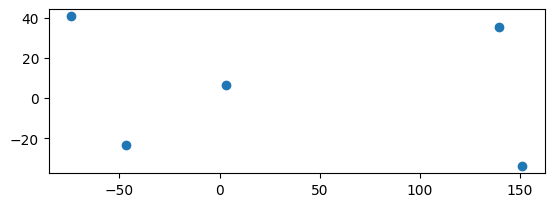

In [ ]:
gdf.plot()
# rudimentary visualization of my data
# scatterplot of the different points on the map where we have our different cities
# no context, no basemap, no labels

In [ ]:
import matplotlib.pyplot as plt

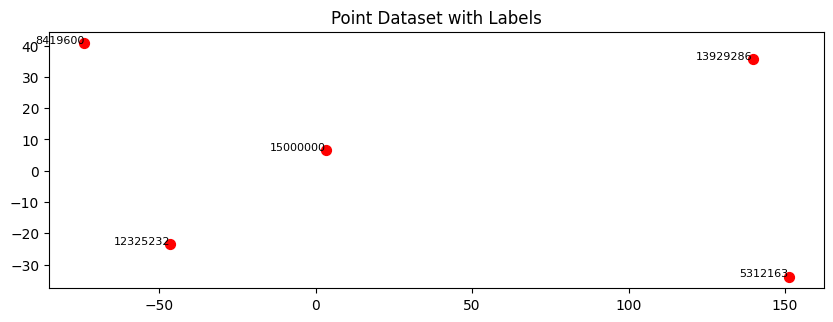

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=50)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Population"]):
    ax.text(x, y, label, fontsize=8, color='black', ha='right')
plt.title("Point Dataset with Labels")
plt.show()

In [ ]:
gdf = gdf.set_crs(epsg=4326)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf.explore()
# interactive visualization with folium under the hood
# you can zoom in and out, pan around, click on points to see attributes
# very useful for quick data exploration


# Maybe you need to trust the notebook to enable the interactivity
# If so, run this command:
# ! jupyter trust geopandas-2.ipynb

In [ ]:
pip install folium mapclassify -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
gdf.explore()

### Exploring and Setting the Coordinate Reference System (CRS)

Before working with spatial data, it’s essential to check and define the **Coordinate Reference System (CRS)** of your GeoDataFrame.

If you inspect the CRS using:

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

and it returns nothing, it means the `GeoDataFrame` does not yet have a defined projection.

You can assign one using the set_crs() method. There are several ways to do this:
- Using an **EPSG integer code** (e.g., 4326)
- Using an **EPSG string** (e.g., "EPSG:4326")
- Using a **Proj4 string** (advanced use cases)

Example:

In [ ]:
gdf = gdf.set_crs("EPSG:4326") # this set the projection

In [ ]:
# After setting it, you can confirm the CRS was applied correctly:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Note:**
Defining a CRS does not reproject your data — it simply tells GeoPandas what the current coordinate system is.
To reproject to another CRS (e.g., to meters), use:

In [ ]:
gdf = gdf.to_crs(epsg=4326)  # Reproject to WGS84 (latitude and longitude)

In [ ]:
gdf.explore()

## 🌿 Leafmap: A Powerful Tool for Interactive Geospatial Analysis

[`leafmap`](https://leafmap.org/) is a versatile Python library designed for **interactive mapping and geospatial analysis** in Jupyter environments.

- It integrates **multiple visualization and GIS platforms** (e.g., Folium, ipyleaflet, Google Earth Engine) under one unified interface.
- Created and maintained by **Dr. Qiusheng Wu** (University of Tennessee), who also provides excellent tutorials on his [YouTube channel](https://www.youtube.com/@QiushengWu).
- Leafmap supports **rich functionality**: map drawing tools, basemap switching, time sliders, data overlays, and more.

Whether you are building exploratory maps or developing geospatial apps, `leafmap` helps you do more with **less code** and more **interactive control**.

In [ ]:
pip install leafmap -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U ipywidgets -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import leafmap

In [ ]:
m = leafmap.Map(center=[0, 0], zoom=2)

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

In [ ]:
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

`leafmap` acts like a **mini GIS platform** right inside your Jupyter notebook.

- You can **draw shapes**, annotate, and interact with maps.
- **Raster and vector data** can be opened and explored without explicitly importing them into GeoPandas.
- **Basemaps** can be changed easily:
  - OpenStreetMap (default)
  - Google Maps
  - ESRI, USGS, and many others (some require authentication)

**Example:** You can load a **USGS Topographic map** or switch to **Google Hybrid** view in just one line of code.

$\implies$ This makes `leafmap` ideal for rapid geospatial prototyping, teaching, and interactive exploration — **without leaving the notebook**.

In [ ]:
m.add_gdf(gdf, layer_name="Points")
# this adds our geopandas dataframe to the map
# it updates the original map

In [ ]:
m.add_basemap("Esri.WorldImagery")  # Satellite imagery
m.add_basemap("OpenStreetMap")      # OpenStreetMap layer

OpenStreetMap has been already added before.


In [ ]:
gdf.head()

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.7128,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.5505,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.6895,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.5244,3.3792,POINT (3.3792 6.5244)
4,Sydney,5312163,-33.8688,151.2093,POINT (151.2093 -33.8688)


In [ ]:
m = leafmap.Map(center=[0, 0], zoom=2)
# m.add_gdf(gdf, layer_name="Points", popup=['Name', 'Population'])
m.add_gdf(gdf, layer_name="Points", info_mode="on_click")
m

## 🛰️ LawnBoard: Scalable Visualization for Large Geospatial Data

[LawnBoard](https://github.com/lawnjockey/lawnb) is a high-performance geospatial visualization library designed to handle **large-scale datasets** efficiently in Jupyter notebooks.

- ⚡️ Built on top of technologies like **GeoArrow**, **GeoParquet**, and **GPU-accelerated rendering**
- 🧩 Can be accessed via `leafmap` (which integrates many geospatial tools)
- 🗺️ Ideal for rendering and interacting with **large geospatial datasets** that go beyond the scale of a typical GeoDataFrame
- 🧪 In practice: try it with their example datasets like **speed test data** to explore its capabilities

> For now, our examples use small datasets — but `LawnBoard` shines when working with **massive geospatial data** in a notebook-friendly environment.

In [ ]:
pip install lonboard palettable sidecar -q

Note: you may need to restart the kernel to use updated packages.


Moreover we need parquet support in Pandas: `pyarrow` vs `fastparquet`

To read `.parquet` files in Pandas, you need one of the following libraries:

- **`pyarrow`**  
  Developed by the Apache Arrow project, `pyarrow` is the **default and most widely supported engine** for working with Parquet files. It’s fast, feature-rich, and supports complex data types.

- **`fastparquet`**  
    A lighter alternative optimized for speed in certain scenarios. Developed by the Dask team, it can be slightly faster for simple datasets, but supports fewer Parquet features.

**Pandas does not include either by default**, so you need to install one of them using:
```bash
pip install pyarrow
# or
pip install fastparquet

In [ ]:
pip install pyarrow -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install fastparquet -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import shapely
from palettable.colorbrewer.diverging import BrBG_10
from sidecar import Sidecar

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

In [ ]:
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"
# Internet Speed Test made available by Ookla as open data hostedby AWS

In [ ]:
local_path = Path("internet-speeds.parquet")
if local_path.exists():
    gdf = gpd.read_parquet(local_path)
else:
    columns = ["avg_d_kbps", "tile"]
    df = pd.read_parquet(url, columns=columns) # create the dataframe from the parquet file

    tile_geometries = shapely.from_wkt(df["tile"])
    # convert the WKT geometries to shapely geometries-create different tiles
    tile_centroids = shapely.centroid(tile_geometries) # get the centroids of the geometries
    gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids, crs="EPSG:4326")
    gdf.to_parquet(local_path)

In [ ]:
gdf.head()
# this data are the point (latitude and longitude) centroids of different tiles
# with the average download speed in kbps for mobile connections

,avg_d_kbps,geometry
0,5983,POINT (-160.01862 70.63722)
1,3748,POINT (-160.04059 70.63357)
2,3364,POINT (-160.04059 70.63175)
3,2381,POINT (-160.0351 70.63357)
4,3047,POINT (-160.0351 70.63175)


In [ ]:
sidecar = Sidecar()

In [ ]:
layer = ScatterplotLayer.from_geopandas(gdf)
# create a scatterplot layer from the geopandas dataframe
m = Map(layer, height=800)
# with sidecar:
#     display(m)
m

NameError: name 'ArrowDtype' is not defined

In [ ]:
layer.get_fill_color = [0, 0, 200, 200]

In [ ]:
min_bound = 5000
max_bound = 50000
download_speed = gdf["avg_d_kbps"] # average speed compared to the area around it 
normalized_download_speed = (download_speed - min_bound) / (max_bound - min_bound)
# normalize the download speed values between 0 and 1

In [ ]:
normalized_download_speed

0          0.021844
1         -0.027822
2         -0.036356
3         -0.058200
4         -0.043400
             ...   
3231240    0.322844
3231241    0.237622
3231242    0.483267
3231243    1.399889
3231244   -0.083778
Name: avg_d_kbps, Length: 3231245, dtype: float64

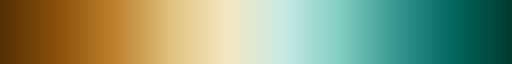

In [ ]:
BrBG_10.mpl_colormap
# color ramp from palettable library

In [ ]:
layer.get_fill_color = apply_continuous_cmap(
    normalized_download_speed, BrBG_10, alpha=0.7
)

In [ ]:
layer.get_radius = normalized_download_speed * 200
layer.radius_units = "meters" 
layer.radius_min_pixels = 0.5

In [ ]:
m

Map(custom_attribution='', height='800px', layers=(ScatterplotLayer(get_fill_color=arro3.core.ChunkedArray<Fix…